# Basics of logistic regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [ ]:
raw_data = pd.read_csv(r'https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
raw_data.head(1)
raw_data.columns = raw_data.columns.str.strip()
raw_data['Distance (mi)'] = pd.to_numeric(raw_data['Distance (mi)'], errors='coerce')
raw_data['Workout Time (seconds)'] = pd.to_numeric(raw_data['Workout Time (seconds)'], errors='coerce')

In [ ]:
# raw_data['Distance (mi)'] = raw_data['Distance (mi)'].astype(float)

In [ ]:
#create my bins
bins = [0, 3.09, 6.19, 13.1, 20]
bins2 = [0, 6.19, 20]
labels2 = ['No', 'Yes']
labels = ['Short', '5k', '10k', 'half-marathon']
raw_data['10k'] = pd.cut(raw_data['Distance (mi)'], bins=bins2, labels=labels2)
raw_data['Run_Type'] = pd.cut(raw_data['Distance (mi)'], bins=bins, labels=labels)

In [ ]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Run_Type_Binaryish'] = data['Run_Type'].map({'Short': 1, '5k': 2, '10k': 3, 'half-marathon':4})
data['10k2'] = data['10k'].map({'No': 0, 'Yes': 1})


In [ ]:
data['Workout Date'] = pd.to_datetime(data['Workout Date'])
data['Date Submitted'] = pd.to_datetime(data['Date Submitted'])
mean_speed = data['Avg Heart Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
data['day_of_week']=data['Workout Date'].dt.day_name()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          720 non-null    datetime64[ns]
 1   Workout Date            720 non-null    datetime64[ns]
 2   Activity Type           720 non-null    object        
 3   Calories Burned (kCal)  720 non-null    int64         
 4   Distance (mi)           720 non-null    float64       
 5   Workout Time (seconds)  720 non-null    int64         
 6   Avg Pace (min/mi)       720 non-null    float64       
 7   Max Pace (min/mi)       720 non-null    float64       
 8   Avg Speed (mi/h)        720 non-null    float64       
 9   Max Speed (mi/h)        720 non-null    float64       
 10  Avg Heart Rate          476 non-null    float64       
 11  Steps                   696 non-null    float64       
 12  Notes                   720 non-null    object    

In [ ]:
data = data[data['Avg Pace (min/mi)'].between(6, 13)]

In [ ]:
data.shape

(551, 20)

In [ ]:
meanahr = data['Avg Heart Rate'].mean()
data['Avg Heart Rate'].fillna(value = meanahr, inplace = True)
#data.fillna(meanahr, inplace = True)

In [ ]:
data2 = data.dropna()
data2 = data2.drop_duplicates()

In [ ]:
data2.shape

(551, 20)

In [ ]:
data.corr()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
Calories Burned (kCal),1.000000,0.974158,0.968235,0.257675,-0.124132,-0.257779,0.053651,0.190406,0.961201
Distance (mi),0.974158,1.000000,0.981804,0.225352,-0.115349,-0.226538,0.068722,0.227835,0.982859
Workout Time (seconds),0.968235,0.981804,1.000000,0.377599,-0.085772,-0.373161,0.084119,0.222648,0.987160
Avg Pace (min/mi),0.257675,0.225352,0.377599,1.000000,0.097539,-0.989440,0.052339,0.143127,0.325843
Max Pace (min/mi),-0.124132,-0.115349,-0.085772,0.097539,1.000000,-0.104268,-0.082239,0.014258,-0.125646
Avg Speed (mi/h),-0.257779,-0.226538,-0.373161,-0.989440,-0.104268,1.000000,-0.052274,-0.155289,-0.328230
Max Speed (mi/h),0.053651,0.068722,0.084119,0.052339,-0.082239,-0.052274,1.000000,0.038351,0.082367
Avg Heart Rate,0.190406,0.227835,0.222648,0.143127,0.014258,-0.155289,0.038351,1.000000,0.222319
Steps,0.961201,0.982859,0.987160,0.325843,-0.125646,-0.328230,0.082367,0.222319,1.000000


## Variables

In [ ]:
# Create the dependent and independent variables
y = data2['10k2']
x1 = data2['Calories Burned (kCal)']

In [ ]:
y.shape

(551,)

In [ ]:
x1.shape

(551,)

In [ ]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.059334
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   10k2   No. Observations:                  551
Model:                          Logit   Df Residuals:                      549
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Aug 2022   Pseudo R-squ.:                  0.8397
Time:                        14:01:20   Log-Likelihood:                -32.693
converged:                       True   LL-Null:                       -203.92
Covariance Type:            nonrobust   LLR p-value:                 1.859e-76
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -15.2137      2.046     -7.436      0.000     -19.224     -11.204
Calories Burned (kCal)     0.0209      0.003      7.442      0.000       0.015       0.026
==========================================================================================

Possibly complete quasi-separation: A fraction 0.21 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Let's plot the data

### Scatter plot

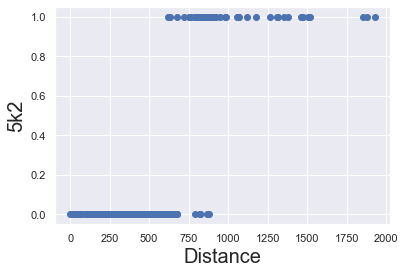

In [ ]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('5k2', fontsize = 20)
plt.show()

### Plot with a regression line

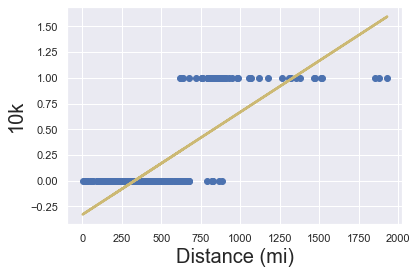

In [ ]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
plt.show()

### Plot a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.059334
         Iterations 10


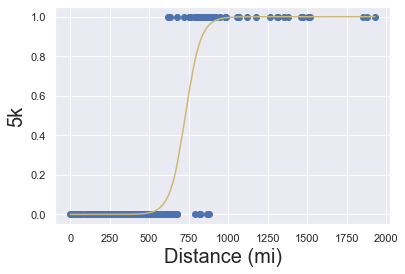

In [ ]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('Distance (mi)', fontsize = 20)
plt.ylabel('5k', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

Optimization terminated successfully.
         Current function value: 0.059334
         Iterations 10


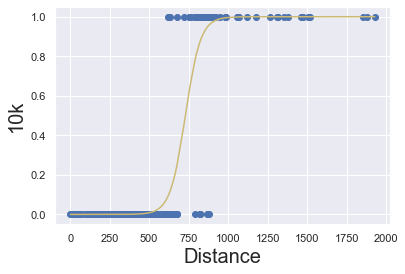

In [ ]:
# Creating a logit regression (we will discuss this in another notebook)
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('Distance', fontsize = 20)
plt.ylabel('10k', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

## Log Reg Part 2

In [ ]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns



In [ ]:
#This creates my dictionary of estimators
knn = KNeighborsClassifier() #default is k=5 nearest neighbors
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [ ]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 715
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          551 non-null    datetime64[ns]
 1   Workout Date            551 non-null    datetime64[ns]
 2   Activity Type           551 non-null    object        
 3   Calories Burned (kCal)  551 non-null    int64         
 4   Distance (mi)           551 non-null    float64       
 5   Workout Time (seconds)  551 non-null    int64         
 6   Avg Pace (min/mi)       551 non-null    float64       
 7   Max Pace (min/mi)       551 non-null    float64       
 8   Avg Speed (mi/h)        551 non-null    float64       
 9   Max Speed (mi/h)        551 non-null    float64       
 10  Avg Heart Rate          551 non-null    float64       
 11  Steps                   551 non-null    float64       
 12  Notes                   551 non-null    object    

In [ ]:
dataframe = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)','Steps']]
dataframetarget = data[['Run_Type_Binaryish']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataframe, dataframetarget, random_state=11)  # random_state for reproducibility

In [ ]:
knn.fit(X=X_train, y=y_train)

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
expected_labels = y_test #We also require our expected labels for future analysis.

In [ ]:
predicted_labels = knn.predict(X=X_test)

In [ ]:
print(predicted_labels[:20])

[2 2 3 3 2 2 2 2 2 3 1 2 2 1 2 1 2 1 2 1]


In [ ]:
print(expected_labels[:20])

    Run_Type_Binaryish
93                   2
262                  2
147                  3
460                  3
103                  2
318                  2
62                   2
317                  2
336                  2
61                   3
435                  1
543                  2
354                  2
513                  2
311                  2
607                  1
250                  2
58                   1
106                  2
645                  1


In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted_labels, expected_labels) if p != e]

print(wrong)
print(f'The classifier incorrectly predicted {len(wrong)} of {len(expected_labels)} samples.')

[(2, 'Run_Type_Binaryish')]
The classifier incorrectly predicted 1 of 138 samples.


In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')

91.30%


In [ ]:
confusion = confusion_matrix(y_true=expected_labels, y_pred=predicted_labels)

In [ ]:
confusion

array([[29,  7,  0,  0],
       [ 2, 77,  1,  0],
       [ 0,  0, 20,  0],
       [ 0,  0,  2,  0]], dtype=int64)

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(4), columns=range(4))

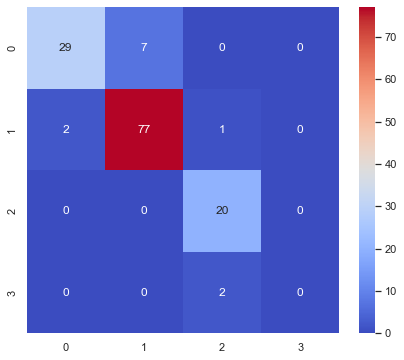

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='coolwarm') 

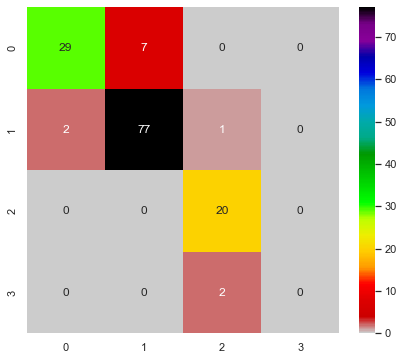

In [ ]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap='nipy_spectral_r') 

## K-Fold Class (2 Fold)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [ ]:
kfold = KFold(n_splits=2, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
scores*100

array([90.57971014, 93.09090909])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 91.84%


## K-Fold Class (20 Fold)

In [ ]:
kfold = KFold(n_splits=20, random_state=11, shuffle=True)

In [ ]:
scores = cross_val_score(estimator=knn, X=dataframe, y=dataframetarget, cv=kfold)

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [ ]:
scores*100

array([ 96.42857143,  82.14285714,  92.85714286,  89.28571429,
        92.85714286,  85.71428571,  96.42857143,  96.42857143,
        92.85714286,  92.85714286, 100.        ,  96.2962963 ,
        96.2962963 ,  96.2962963 , 100.        ,  88.88888889,
        88.88888889,  88.88888889,  88.88888889,  88.88888889])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.56%


## Multiple Models

In [ ]:
#Adding my additional estimators to see which model is the most accurate
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
#This creates my dictionary of estimators
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(),
    'GaussianNB': GaussianNB()}

In [ ]:
#This will run the estimator model for the three estimators below - KNN, SVC, GNB
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=dataframe, y=dataframetarget, cv=kfold)
    print(f'{estimator_name:>2}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

KNeighborsClassifier: mean accuracy=92.38%; standard deviation=3.41%
SVC: mean accuracy=89.48%; standard deviation=4.43%
GaussianNB: mean accuracy=88.93%; standard deviation=3.77%


C:\Users\coleb\mambaforge\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\coleb\mambaforge\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframe, dataframetarget, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
clf.predict(X_test.iloc[0].values.reshape(1, -1))

C:\Users\coleb\mambaforge\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [ ]:
clf.predict(X_test[0:10])

array([3, 2, 2, 2, 2, 2, 2, 3, 2, 3], dtype=int64)

In [ ]:
score = clf.score(X_test, y_test)
print(score)

0.9782608695652174


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

C:\Users\coleb\AppData\Local\Temp/ipykernel_24444/1914883130.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_ticklist)


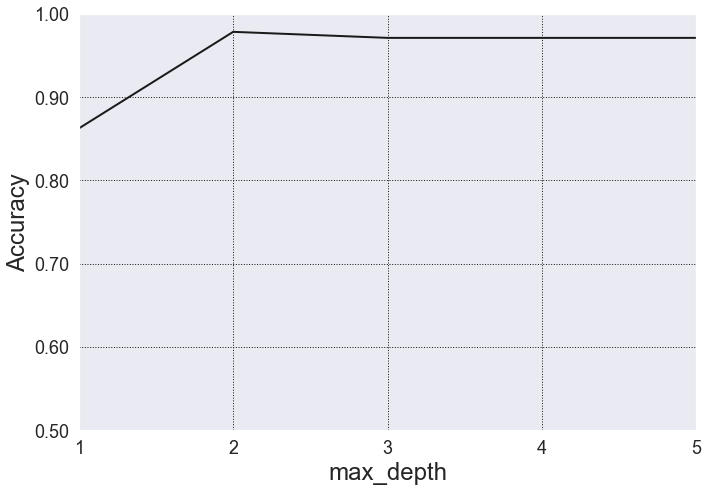

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'k')

yticks = ax.get_yticks()

y_ticklist = []
for tick in yticks:
    y_ticklist.append(str(tick).ljust(4, '0')[0:4])
ax.set_yticklabels(y_ticklist)
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

## Decision Tree Visualization

### Load Packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

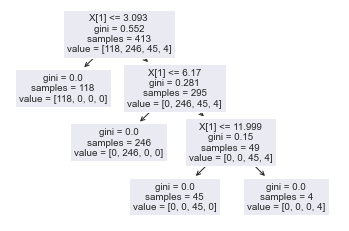

In [ ]:
tree.plot_tree(clf);

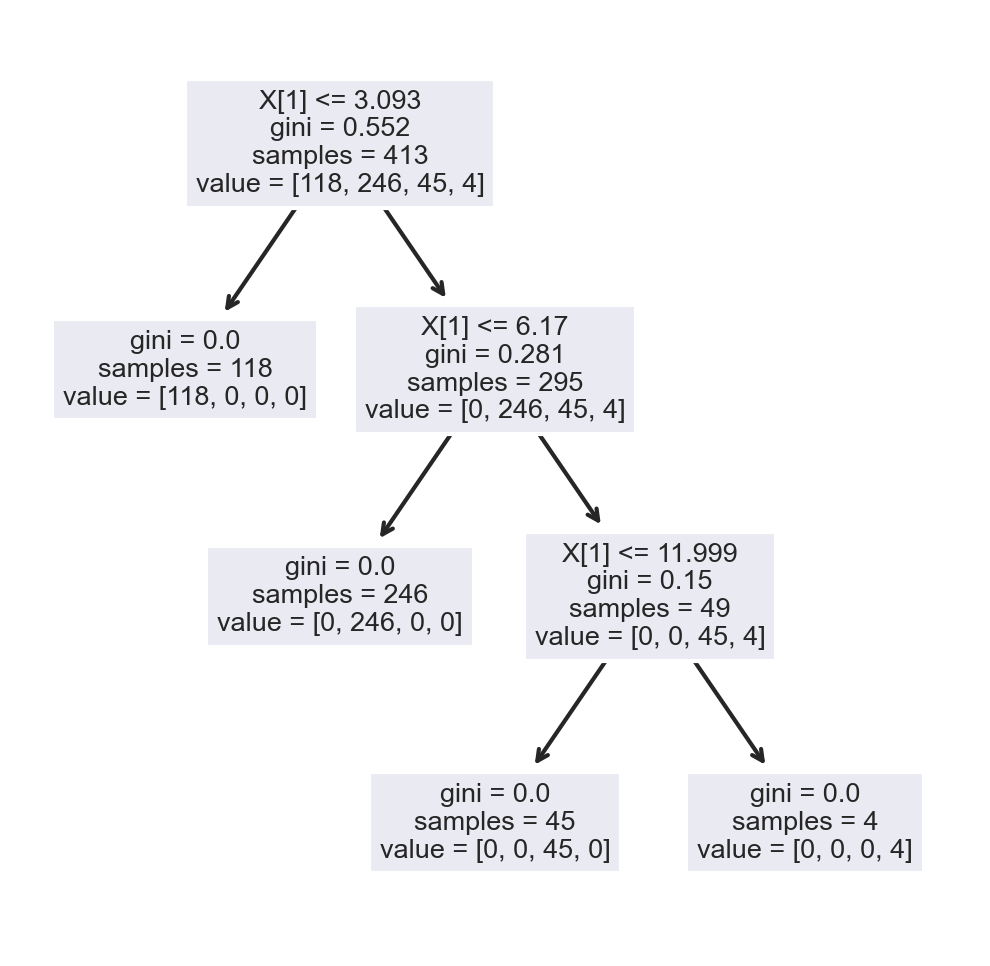

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);

In [ ]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [ ]:
fn = ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']
cn = ['Short Run', '5k', '10k', 'Half Marathon']

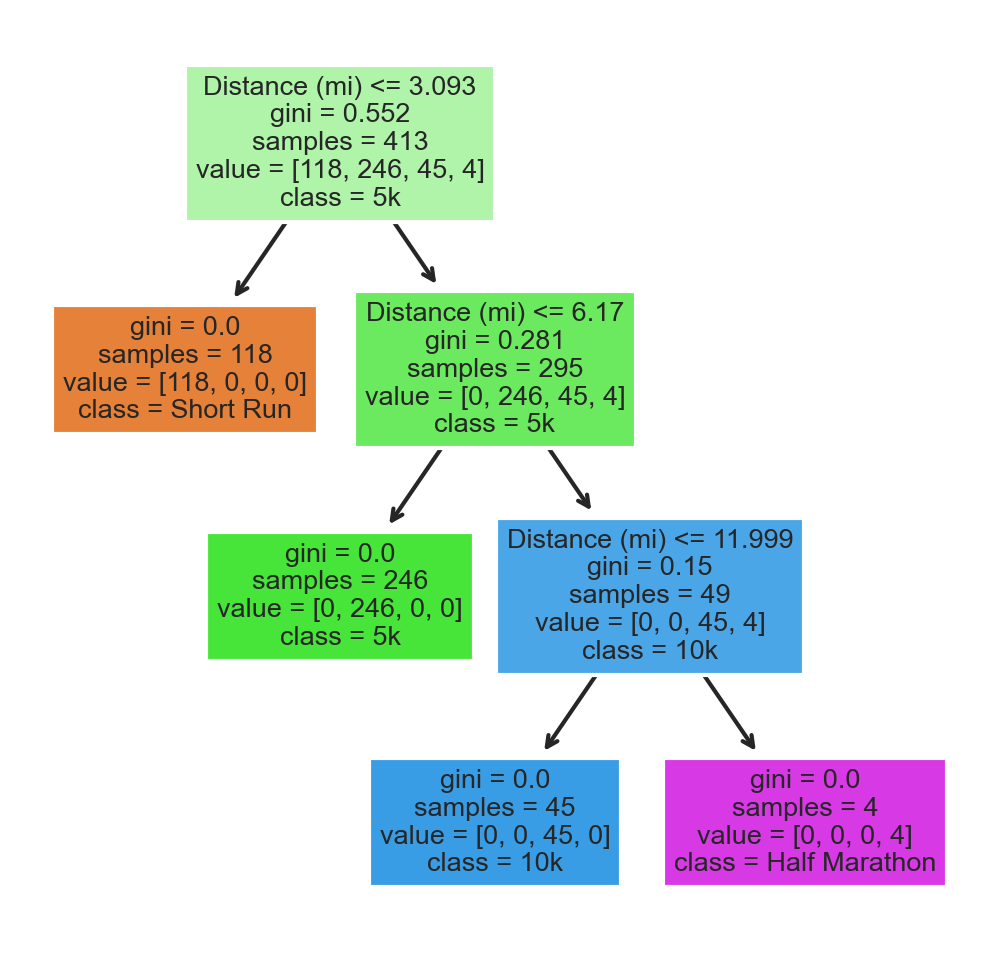

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('plottreefncn.png')

## KNN 

### Load Packages

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [ ]:
# Store the feature data
X = dataframe
# store the target data
y = dataframetarget
Y = dataframetarget
# split the data using Scikit-Learn's train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Train the Data

In [ ]:
X_train.shape

(413, 8)

In [ ]:
X_test.shape

(138, 8)

In [ ]:
y_train.shape

(413, 1)

In [ ]:
y_test.shape

(138, 1)

In [ ]:
dataframe.columns

Index(['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps'],
      dtype='object')

In [ ]:
features = ['Calories Burned (kCal)','Steps']


In [ ]:
x = StandardScaler().fit_transform(x)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


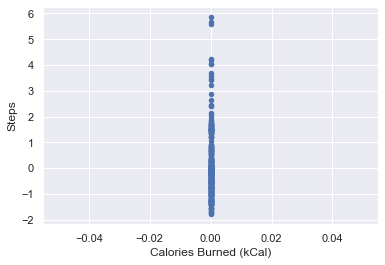

In [ ]:
# Plot 
pd.DataFrame(x, columns = features).plot.scatter('Calories Burned (kCal)','Steps' )

# Add labels
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

In [ ]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
x = pd.DataFrame(x, columns = features)

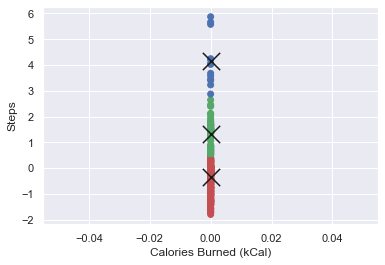

In [ ]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');

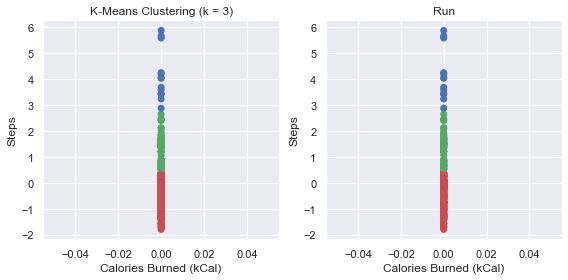

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('K-Means Clustering (k = 3)')
 
plt.subplot(1, 2, 2)
plt.scatter(x['Calories Burned (kCal)'], x['Steps'], c=colormap[labels])
plt.xlabel('Calories Burned (kCal)');
plt.ylabel('Steps');
plt.title('Run')

plt.tight_layout()

## Cluster Analysis

In [ ]:
data.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Notes,Source,Link,10k,Run_Type,Run_Type_Binaryish,10k2,day_of_week
0,2022-08-15,2022-08-15,Indoor Run / Jog,632,4.74,3600,12.6582,10.4218,4.74,5.75715,122.0,8146.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6781978366,No,5k,2,0,Monday


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

In [ ]:
round(data.describe(),2)

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
count,551.00,551.00,551.00,551.00,551.00,551.00,551.00,551.0,551.00
mean,452.92,3.58,2088.58,9.61,1.36,6.30,46.49,124.5,5522.29
std,251.40,1.91,1235.79,0.93,2.59,0.58,122.91,44.7,3205.31
min,2.00,0.02,10.00,7.77,0.00,4.63,0.00,0.0,8.00
25%,344.50,2.97,1560.00,8.98,0.00,6.00,0.00,124.5,4156.00
50%,408.00,3.10,1800.00,9.55,0.79,6.28,17.01,124.5,4796.00
75%,470.50,4.00,2207.00,10.00,1.15,6.68,61.74,152.0,5972.00
max,1928.00,13.48,10191.00,12.95,31.95,7.72,1814.43,169.0,23604.00


In [ ]:

df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
Date Submitted,479
Workout Date,505
Activity Type,4
Calories Burned (kCal),307
Distance (mi),417
Workout Time (seconds),450
Avg Pace (min/mi),529
Max Pace (min/mi),341
Avg Speed (mi/h),531


In [ ]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['10k', '10k2']

In [ ]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['Activity Type', 'Run_Type', 'Run_Type_Binaryish']

In [ ]:
[[i, list(data[i].unique())] for i in categorical_variables]

[['Activity Type', ['Indoor Run / Jog', 'Run', 'Machine Workout', 'Walk']],
 ['Run_Type', ['5k', '10k', 'Short', 'half-marathon']],
 ['Run_Type_Binaryish', [2, 3, 1, 4]]]

In [ ]:
ordinal_variables = ['Run', 'Walk']

In [ ]:
data['day_of_week'].unique()

array(['Monday', 'Sunday', 'Friday', 'Wednesday', 'Tuesday', 'Saturday',
       'Thursday'], dtype=object)

In [ ]:
ordinal_variables.append('day_of_week')

In [ ]:
numeric_variables = list(set(data.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

array([[<AxesSubplot:title={'center':'Workout Time (seconds)'}>,
        <AxesSubplot:title={'center':'Avg Pace (min/mi)'}>,
        <AxesSubplot:title={'center':'Max Speed (mi/h)'}>],
       [<AxesSubplot:title={'center':'Avg Heart Rate'}>,
        <AxesSubplot:title={'center':'Distance (mi)'}>,
        <AxesSubplot:title={'center':'Max Pace (min/mi)'}>],
       [<AxesSubplot:title={'center':'Avg Speed (mi/h)'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Workout Date'}>],
       [<AxesSubplot:title={'center':'Date Submitted'}>,
        <AxesSubplot:title={'center':'Calories Burned (kCal)'}>,
        <AxesSubplot:>]], dtype=object)

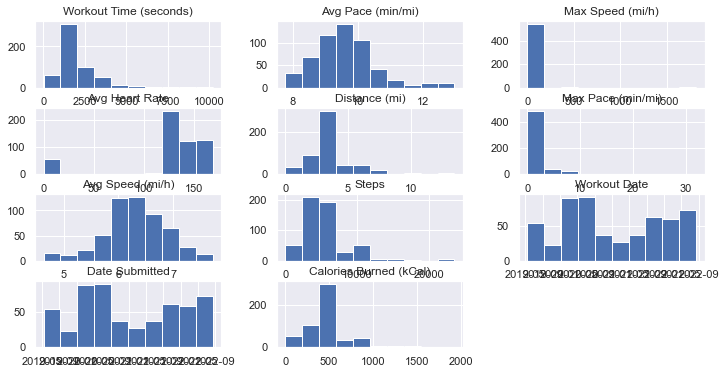

In [ ]:
data[numeric_variables].hist(figsize=(12, 6))

In [ ]:
# data['day_of_week'] = pd.cut(data['day_of_week'], bins=5)

Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
Scale the data using one of the scaling methods discussed in the course.
Save the processed dataframe as a comma-separated file: 

In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [ ]:
lb, le = LabelBinarizer(), LabelEncoder()

In [ ]:
# for column in ordinal_variables:
#     data[column] = le.fit_transform(data[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [ ]:
# for column in [ordinal_variables + numeric_variables]:
#     data[column] = mm.fit_transform(data[column])

In [ ]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [ ]:
df = data

In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 675
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date Submitted          516 non-null    datetime64[ns]
 1   Workout Date            516 non-null    datetime64[ns]
 2   Activity Type           516 non-null    object        
 3   Calories Burned (kCal)  516 non-null    int64         
 4   Distance (mi)           516 non-null    float64       
 5   Workout Time (seconds)  516 non-null    int64         
 6   Avg Pace (min/mi)       516 non-null    float64       
 7   Max Pace (min/mi)       516 non-null    float64       
 8   Avg Speed (mi/h)        516 non-null    float64       
 9   Max Speed (mi/h)        516 non-null    float64       
 10  Avg Heart Rate          516 non-null    float64       
 11  Steps                   516 non-null    float64       
 12  Notes                   516 non-null    object    

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [ ]:
df = df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Steps', '10k2']].round(0)

In [ ]:
# Set up X and y variables
y, X = df['10k2'], df.drop(columns='10k2')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.96      0.98        26

    accuracy                           1.00       207
   macro avg       1.00      0.98      0.99       207
weighted avg       1.00      1.00      1.00       207

Accuracy score:  1.0
F1 Score:  0.98


Text(0.5, 84.5, 'Ground Truth')

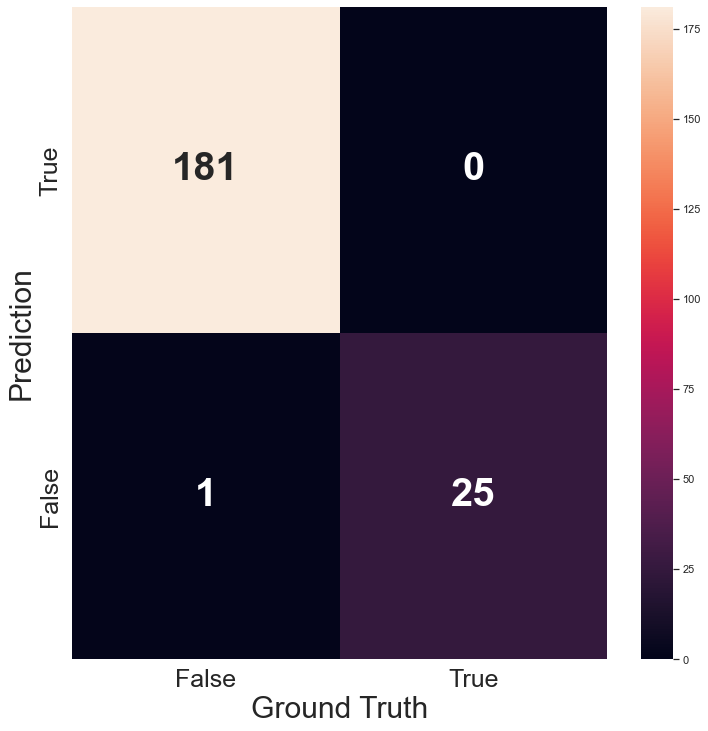

In [ ]:
# Plot confusion matrix
sns.set_palette(sns.color_palette())
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
This time, use K=5 and weight the results by distance.
Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       181
           1       1.00      0.96      0.98        26

    accuracy                           1.00       207
   macro avg       1.00      0.98      0.99       207
weighted avg       1.00      1.00      1.00       207

Accuracy score:  1.0
F1 Score:  0.98


Text(0.5, 84.5, 'Ground Truth')

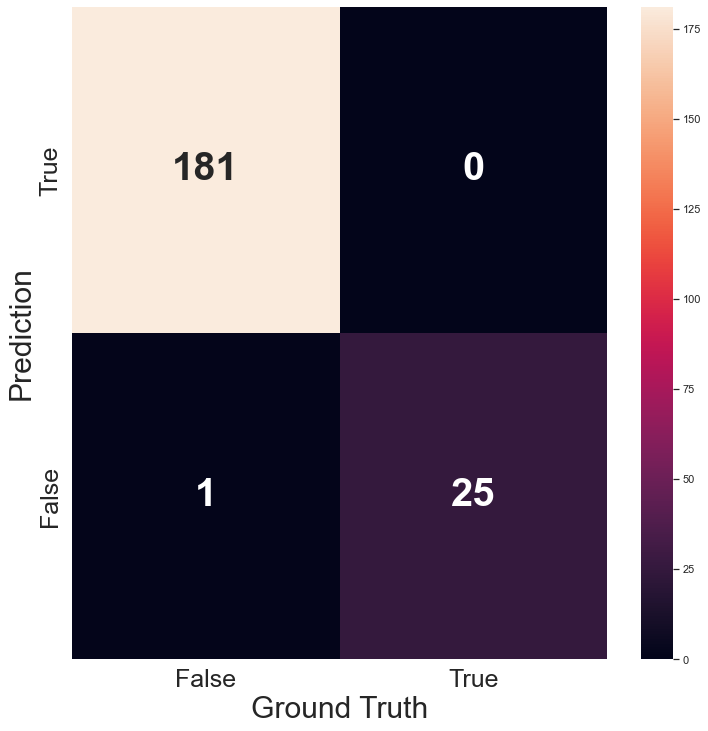

In [ ]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

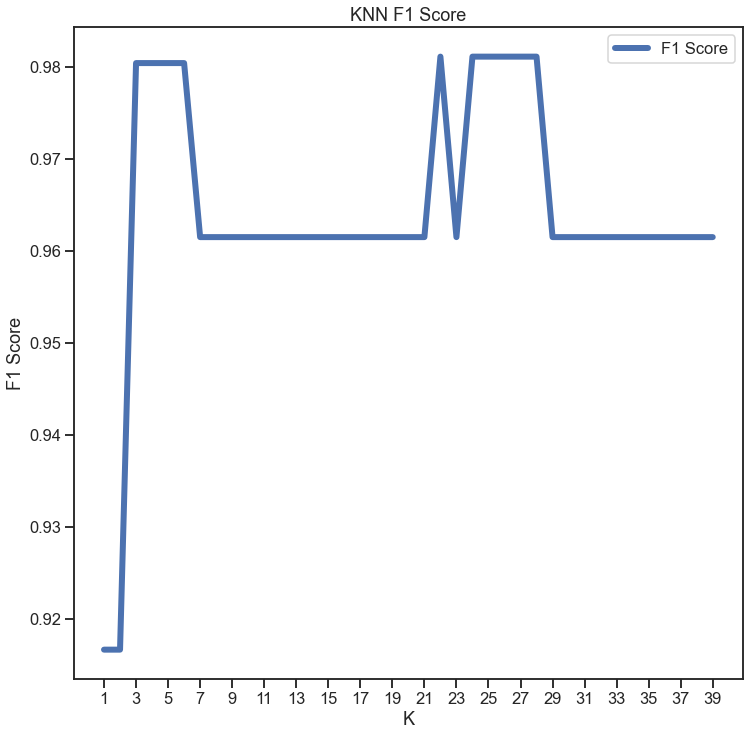

In [ ]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1800x1200 with 0 Axes>

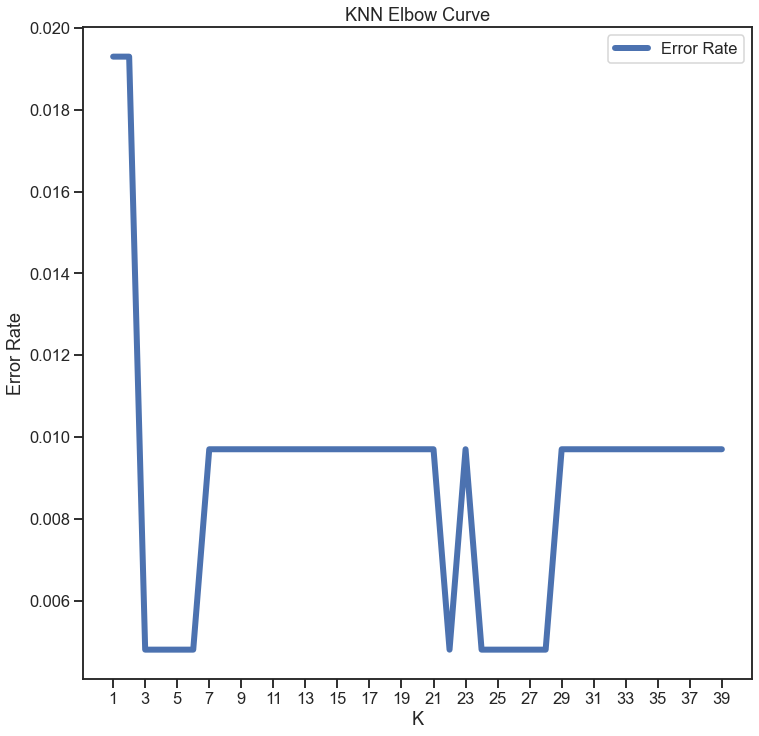

In [ ]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

## KNN

In [ ]:
data2 = data[['Calories Burned (kCal)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Steps', 'Distance (mi)', '10k2']]

In [ ]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1:]

In [ ]:
X.describe()

,Calories Burned (kCal),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Steps,Distance (mi)
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,447.484496,2054.668605,9.562409,1.351160,6.327553,47.030610,5444.414729,3.541362
std,251.582181,1228.997066,0.906790,2.590481,0.565956,126.475776,3196.365506,1.912918
min,2.000000,10.000000,7.774190,0.000000,4.633750,0.000000,8.000000,0.015731
25%,340.500000,1552.500000,8.949298,0.000000,6.025730,0.000000,4127.500000,2.897500
50%,407.500000,1800.000000,9.499410,0.792641,6.316180,16.439650,4789.000000,3.100000
75%,468.000000,2187.000000,9.957292,1.148737,6.704437,61.907650,5895.750000,3.860532
max,1928.000000,10191.000000,12.948500,31.954800,7.717840,1814.430000,23604.000000,13.481600


In [ ]:
y.value_counts(normalize=True)

10k2
0       0.887597
1       0.112403
dtype: float64

<AxesSubplot:xlabel='10k2'>

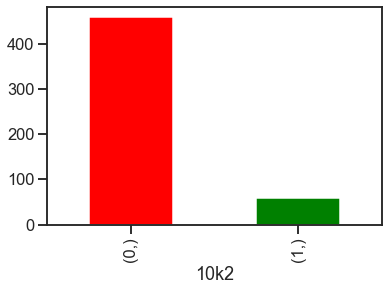

In [ ]:
y.value_counts().plot.bar(color=['red', 'green'])

In [ ]:
# Split 80% as training dataset
# and 20% as testing dataset
rs=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

Training a KNN classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors=2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.


In [ ]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [ ]:
preds = knn_model.predict(X_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [ ]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9807692307692307,
 'recall': 0.9807692307692307,
 'precision': 0.9807692307692307,
 'f1score': 0.9807692307692307}

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0, 'f1score': 1.0}

In [ ]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [ ]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9600
2,0.9091
3,0.9600
4,0.9565
5,1.0000
6,1.0000
7,0.9600
8,1.0000
9,0.9600


Text(0.5, 1.0, 'KNN F1 Score')

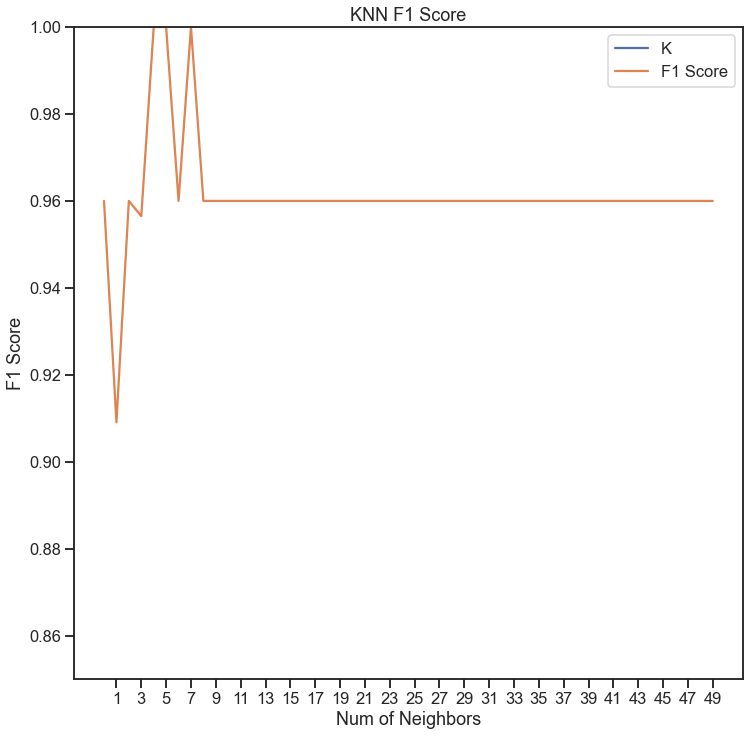

In [ ]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.85, 1))
plt.title('KNN F1 Score')

## Random Forest

In [ ]:
data.columns

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', '10k', 'Run_Type', 'Run_Type_Binaryish', '10k2', 'day_of_week'],
      dtype='object')

In [ ]:
data = data[['Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish', 'day_of_week']]

In [ ]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,447.484496,3.541362,2054.668605,9.562409,1.351160,6.327553,47.030610,123.227129,5444.414729
std,251.582181,1.912918,1228.997066,0.906790,2.590481,0.565956,126.475776,45.542249,3196.365506
min,2.000000,0.015731,10.000000,7.774190,0.000000,4.633750,0.000000,0.000000,8.000000
25%,340.500000,2.897500,1552.500000,8.949298,0.000000,6.025730,0.000000,123.227129,4127.500000
50%,407.500000,3.100000,1800.000000,9.499410,0.792641,6.316180,16.439650,123.227129,4789.000000
75%,468.000000,3.860532,2187.000000,9.957292,1.148737,6.704437,61.907650,152.000000,5895.750000
max,1928.000000,13.481600,10191.000000,12.948500,31.954800,7.717840,1814.430000,169.000000,23604.000000


for col in ['hypertension','heart_disease','stroke']:
 stroke_data_replaced[col]=stroke_data_replaced[col].replace([0,1],['No','Yes'])

In [ ]:
categorical_col=[]
numerical_col=[]
for col in data.dtypes.index:
    if data[col].dtype == 'object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)


In [ ]:

print("Numerical Columns in DataFrame are :",numerical_col, '\n')
print("Categorical Columns in DataFrame are :",categorical_col)


Numerical Columns in DataFrame are : ['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', '10k2', '10k', 'Run_Type_Binaryish'] 

Categorical Columns in DataFrame are : ['Activity Type', 'Notes', 'Source', 'Link', 'day_of_week']


In [ ]:
data = data[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Run_Type', 'Run_Type_Binaryish']]

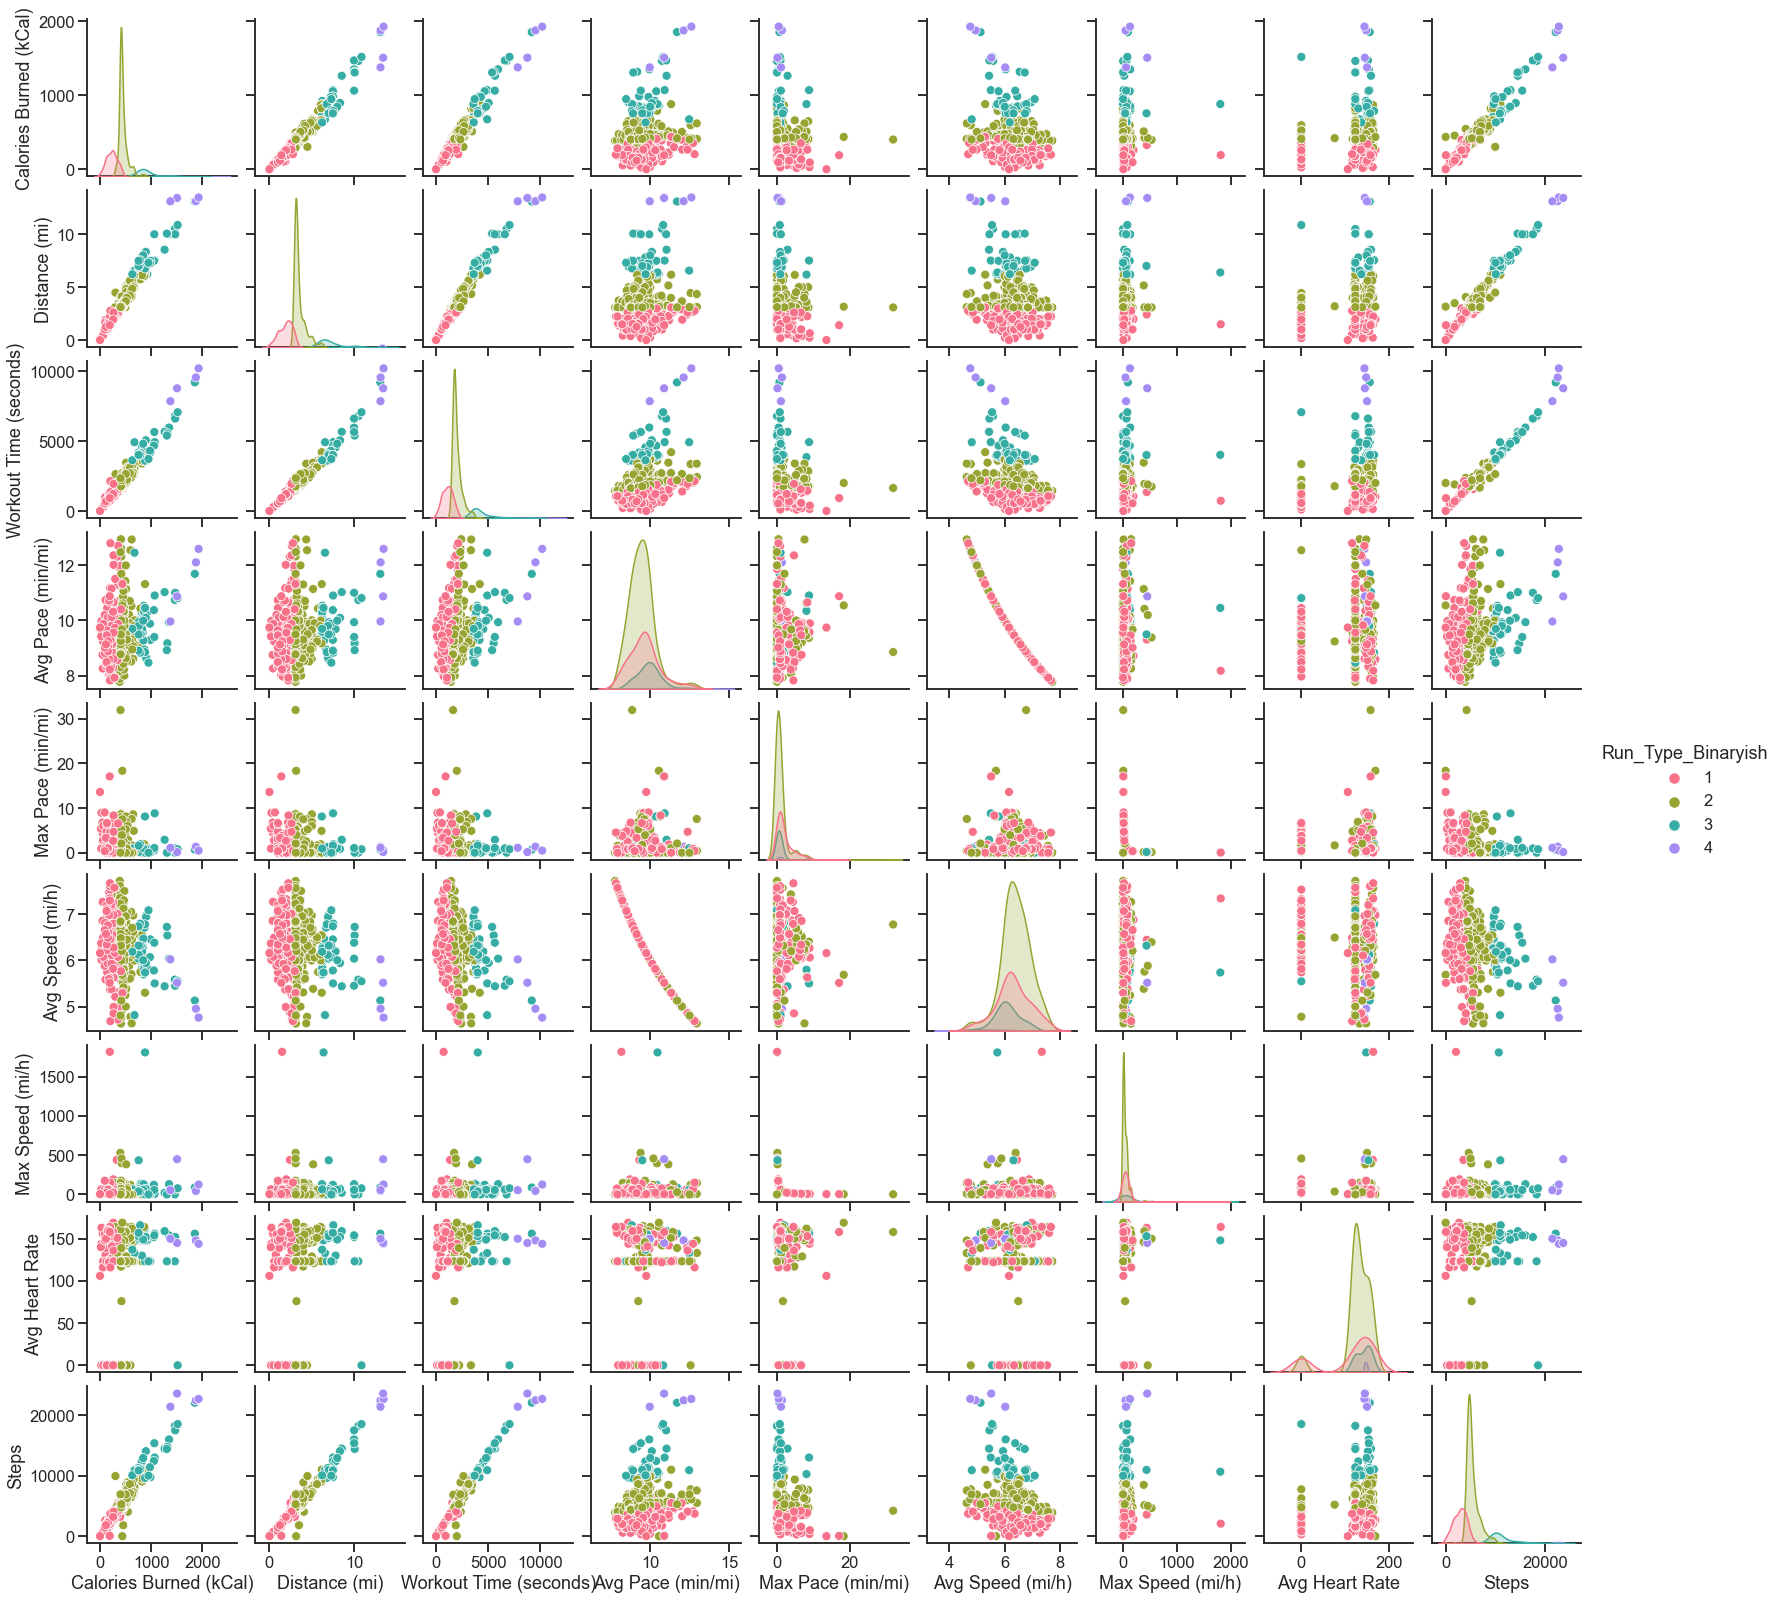

In [ ]:
sns.pairplot(data,hue='Run_Type_Binaryish',palette='husl')


In [ ]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
             columns=['Variable', 'Unique Values']).set_index('Variable')

,Unique Values
Variable,
Calories Burned (kCal),292
Distance (mi),392
Workout Time (seconds),424
Avg Pace (min/mi),499
Max Pace (min/mi),319
Avg Speed (mi/h),501
Max Speed (mi/h),319
Avg Heart Rate,49
Steps,476


In [ ]:
num_missing = data.isnull().sum()
percentage_missing = data.isnull().sum().apply(lambda x: x/data.shape[0]*100)

In [ ]:
missing_data = pd.DataFrame({'Number of Missing':  num_missing,
                             'Percentage of Missing': percentage_missing})

missing_data['Percentage of Missing'].sort_values(ascending = False)

Calories Burned (kCal)    0.0
Distance (mi)             0.0
Workout Time (seconds)    0.0
Avg Pace (min/mi)         0.0
Max Pace (min/mi)         0.0
Avg Speed (mi/h)          0.0
Max Speed (mi/h)          0.0
Avg Heart Rate            0.0
Steps                     0.0
Run_Type                  0.0
Run_Type_Binaryish        0.0
Name: Percentage of Missing, dtype: float64

In [ ]:
from collections import Counter

In [ ]:
def detect_outlier(df,num_cols,outlier_in_row=2):
    outlier_indices=[]
    for col in num_cols:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        step_size=1.5 * IQR
        outlier_indices.extend(df[(df[col]<Q1-step_size) | (df[col]>Q3+step_size)].index)
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=[k for k,v in outlier_indices.items() if v> outlier_in_row]
    return multiple_outliers


    


In [ ]:
drop_outliers=detect_outlier(data,['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps'],2)

In [ ]:
data.loc[drop_outliers]

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,Run_Type,Run_Type_Binaryish
0,856,6.24228,3946,10.53330,1.068360,5.69620,56.16070,156.0,10427.0,10k,3
7,801,6.20547,3735,10.03150,0.991277,5.98118,60.52800,150.0,9802.0,10k,3
12,840,6.20338,3843,10.32430,1.037470,5.81153,57.83330,151.0,10162.0,10k,3
15,814,6.20000,3430,9.22043,0.000000,6.50729,0.00000,149.0,9155.0,10k,3
21,796,6.20509,3701,9.93786,0.430520,6.03752,139.36600,148.0,9854.0,10k,3
...,...,...,...,...,...,...,...,...,...,...,...
408,634,6.23399,3628,9.69842,0.929937,6.18657,64.52050,137.0,10080.0,10k,3
675,191,1.42000,927,10.88030,17.088100,5.51456,3.51122,158.0,67.0,Short,1
242,597,4.45565,3355,12.54950,0.496297,4.78106,120.89500,0.0,7762.0,5k,2
245,621,4.36085,3386,12.93810,7.564670,4.63748,7.93161,148.0,7572.0,5k,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 675
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Calories Burned (kCal)  516 non-null    int64   
 1   Distance (mi)           516 non-null    float64 
 2   Workout Time (seconds)  516 non-null    int64   
 3   Avg Pace (min/mi)       516 non-null    float64 
 4   Max Pace (min/mi)       516 non-null    float64 
 5   Avg Speed (mi/h)        516 non-null    float64 
 6   Max Speed (mi/h)        516 non-null    float64 
 7   Avg Heart Rate          516 non-null    float64 
 8   Steps                   516 non-null    float64 
 9   Run_Type                516 non-null    category
 10  Run_Type_Binaryish      516 non-null    category
dtypes: category(2), float64(7), int64(2)
memory usage: 57.9 KB


In [ ]:
train_df=data.drop(drop_outliers,axis=0).reset_index(drop=True)

In [ ]:
test_df = data.Run_Type_Binaryish

In [ ]:
dataset=pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [ ]:
dataset=dataset.fillna(np.nan)
dataset.isnull().sum()

Calories Burned (kCal)    516
Distance (mi)             516
Workout Time (seconds)    516
Avg Pace (min/mi)         516
Max Pace (min/mi)         516
Avg Speed (mi/h)          516
Max Speed (mi/h)          516
Avg Heart Rate            516
Steps                     516
Run_Type                  516
Run_Type_Binaryish        516
0                         415
dtype: int64

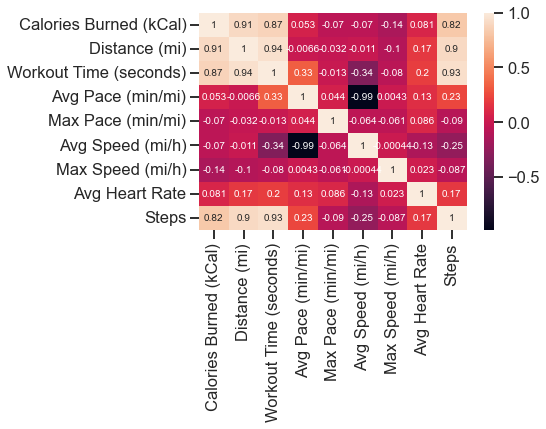

In [ ]:
# Correlation Matrix of Numeric Variables
g=sns.heatmap(train_df[['Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)', 'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps']].corr(),annot=True)

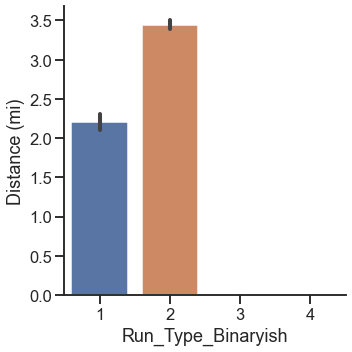

In [ ]:
g=sns.catplot(x='Run_Type_Binaryish',y='Distance (mi)',data=train_df,kind="bar")

In [ ]:
import os

# os.chdir("../input/titanic")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from collections import Counter
# For Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score,learning_curve
sns.set(style='white',context='notebook',palette='deep')

In [ ]:
random_state=1
classifiers=[]
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)
                                      ,random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))

cv_results=[]

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X=X_train,y=Y_train,scoring="accuracy",cv=kfold,n_jobs=-1))

cv_means=[]
cv_std=[]
for i in cv_results:
    cv_means.append(i.mean())
    cv_std.append(i.std())
cv_res=pd.DataFrame({"cross_val_means":cv_means,"cross_val_std":cv_std,
                     "Algorithm":["SVC","DecisionTree","Adabosst","RandomForest","Extratree","GradientBoost","Kneighbours","LR"]})

NameError: name 'Y_train' is not defined

In [ ]:
train=dataset[:len(train_df)]
test=dataset[len(train_df):]
test.drop(labels="Run_Type_Binaryish",axis=1,inplace=True)

In [ ]:
train["Run_Type_Binaryish"]=train["Run_Type_Binaryish"].astype(int)
Y_train=train["Run_Type_Binaryish"]
X_train=train.drop(labels="Run_Type_Binaryish",axis=1)

In [ ]:
kfold=StratifiedKFold(n_splits=10)

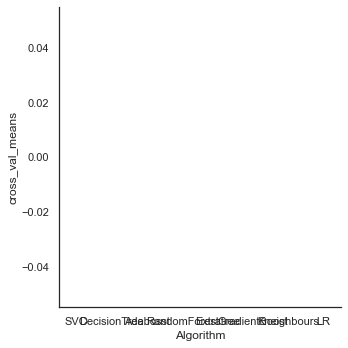

In [ ]:
g=sns.catplot(x="Algorithm",y="cross_val_means",data=cv_res,kind="bar")

In [ ]:
cv_res

,cross_val_means,cross_val_std,Algorithm
0,NaN,NaN,SVC
1,NaN,NaN,DecisionTree
2,NaN,NaN,Adabosst
3,NaN,NaN,RandomForest
4,NaN,NaN,Extratree
5,NaN,NaN,GradientBoost
6,NaN,NaN,Kneighbours
7,NaN,NaN,LR


In [ ]:
decision_tree=DecisionTreeClassifier()
adadecision=AdaBoostClassifier(decision_tree,random_state=random_state)
ada_param_grid={"base_estimator__criterion":["gini","entropy"],
               "base_estimator__splitter":["best","random"],
               "algorithm":["SAMME","SAMME.R"],
               "n_estimators":[1,2,50,100,200],
               "learning_rate":[0.0001,0.001,0.01,0.1,0.2,0.3]}

grid_serarch=GridSearchCV(adadecision,param_grid=ada_param_grid,cv=kfold,
                          scoring="accuracy",n_jobs=-1,verbose=1)
grid_serarch.fit(X_train,Y_train)
ada_best=grid_serarch.best_estimator_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


ValueError: Input contains NaN

In [ ]:
RFC=RandomForestClassifier()
rfc_grid={"bootstrap":[True,False],
          "n_estimators":[100,200,300,400,500]
         }
grid_serach_rf=GridSearchCV(RFC,rfc_grid,cv=kfold,n_jobs=-1,scoring="accuracy",verbose=-1)
grid_serach_rf.fit(X_train,Y_train)
rf_best=grid_serach_rf.best_estimator_
grid_serach_rf.best_score_

ValueError: could not convert string to float: '5k'